In [1]:
import numpy as np
import pandas as pd

from numpy import linalg as LA

from scipy import ndimage
from scipy import stats
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

In [9]:
import matplotlib.pyplot as plt
import scienceplots


plt.style.use(['science','grid'])
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams.update({'font.size': 28})

In [3]:
def sigmoidFunction(x, a, b, c, d):
  return (1 / (1 + np.exp(-(x + a) * b))) * c + d

def quadFunction(x, a, b, c):
  return a * x**2 + b*x + c

In [4]:
x=np.arange(3.60,3.81,0.01)
y=np.array([-199.2,-199.3,-199.3,-199.3,-199.3,-198.7,-197.0,-195.5,-192.2,-187.2,-80.5,-4.9,3.5,8.4,9.4,9.4,9.4,9.4,9.4,9.4,9.4])

In [5]:
popt, pcov = curve_fit(sigmoid, x, y,p0=[-3.70,100,50,-100])

In [6]:
np.sqrt(np.diag(pcov))

array([1.70992990e-04, 1.57020902e+01, 1.15273252e+00, 8.07102828e-01])

In [7]:
3.70

3.7

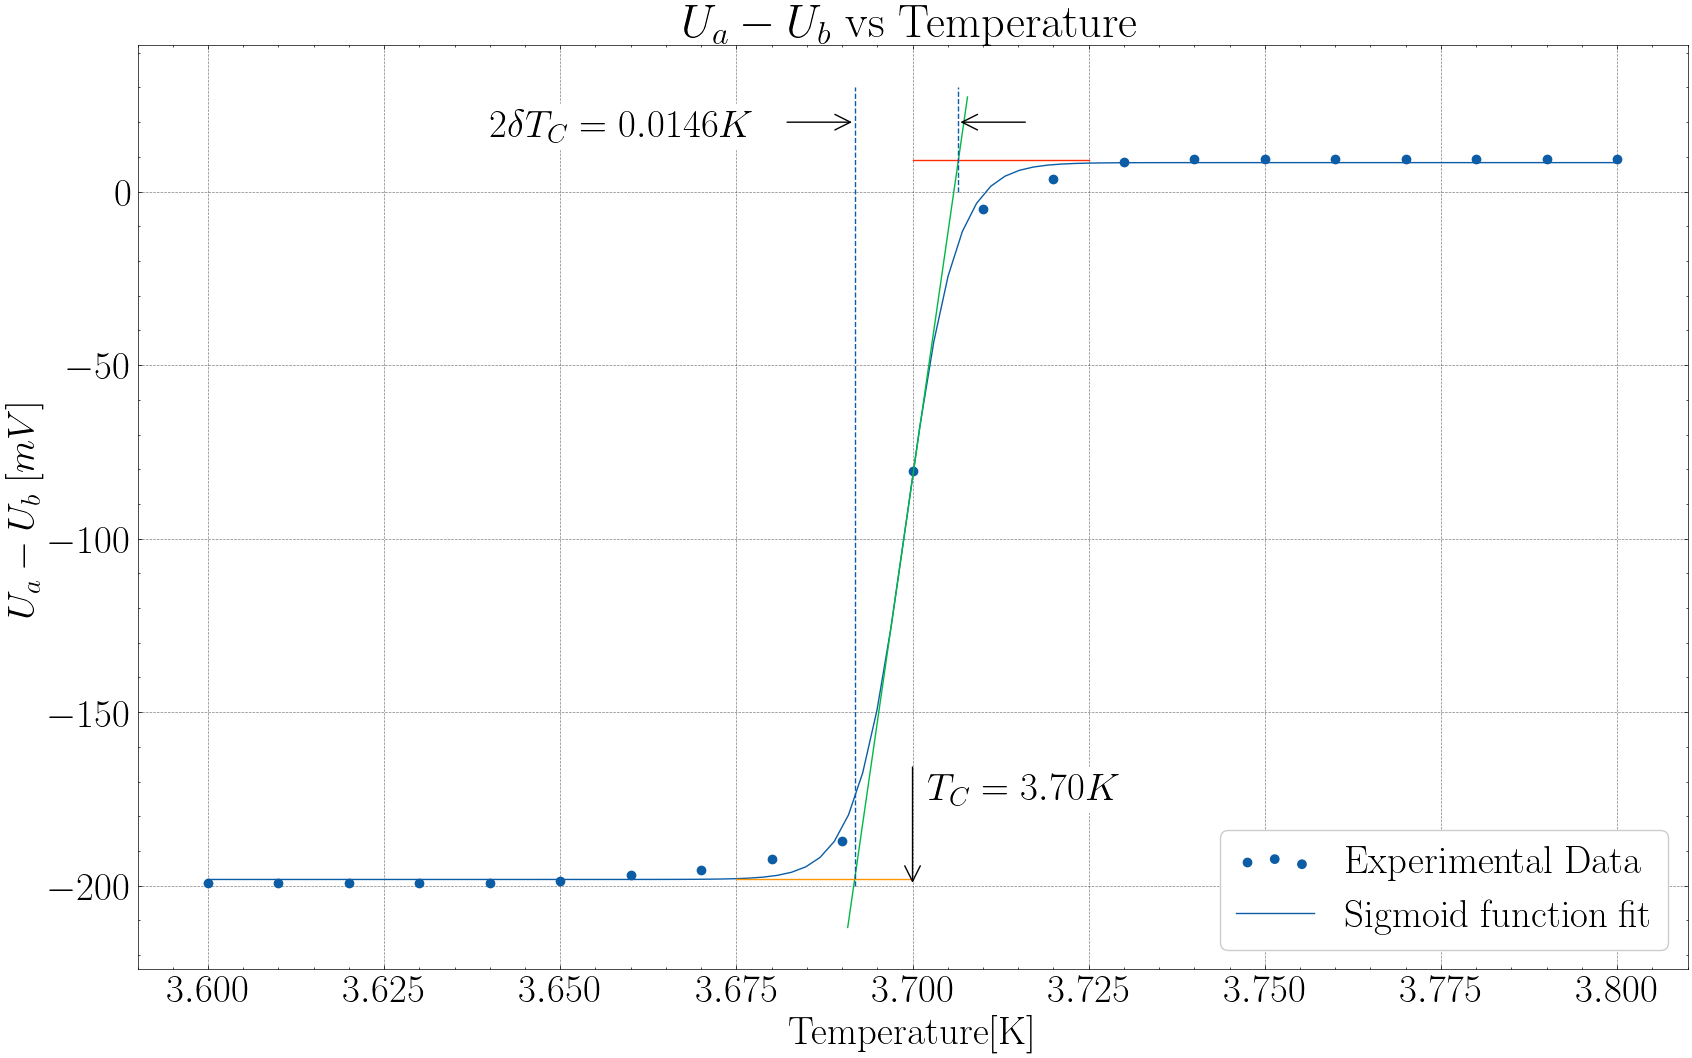

In [10]:
plt.scatter(x,y,label="Experimental Data")
x1=np.linspace(3.60,3.80,100)
plt.plot(x1,sigmoid(x1,-3.69911747,  281.84665013,  206.53930018, -198.19198229),label="Sigmoid function fit")
xm=np.linspace(3.6908,3.7078,10)
plt.plot(xm,xm*14074.794403622174-52159.27639155297)
xa=np.linspace(3.675,3.70,10)
plt.plot(xa,[-198.2]*10)
xb=np.linspace(3.70,3.725,10)
plt.plot(xb,[9.0]*10)

plt.vlines(3.6918,-200,30,linestyle="--")
plt.vlines(3.7064,0,30,linestyle="--")

plt.annotate("",
            xy=(3.7064, 20), xycoords='data',
            xytext=(3.7164, 20), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("",
            xy=(3.6818, 20), xycoords='data',
            xytext=(3.6918, 20), textcoords='data',
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3"),
            )


plt.annotate("",
            xy=(3.70, -200), xycoords='data',
            xytext=(3.70, -165), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )


plt.annotate(r'$2\delta T_C=0.0146K$', xy=(3.640, 16),  xycoords='data',backgroundcolor="w"
            )

plt.annotate(r'$T_C=3.70K$', xy=(3.702, -175),  xycoords='data',backgroundcolor="w"
            )

plt.title(r"$U_a - U_b$ vs Temperature")

plt.xlabel(r"Temperature[K]")
plt.ylabel(r"$U_a - U_b$ $[mV]$")

plt.legend(loc=4,scatterpoints=3)
plt.show()



In [12]:
c=np.array([0,2.478,3.87,4.75,5.74])
t=np.array([3.70,3.00,2.55,2.2,1.7])
x=1-(t/3.7)**2
b=c*5.3

In [13]:
popt, pcov = curve_fit(quad, t,b)

In [14]:
popt

array([-2.96368512,  0.73035124, 37.81278903])

In [15]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])


['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']


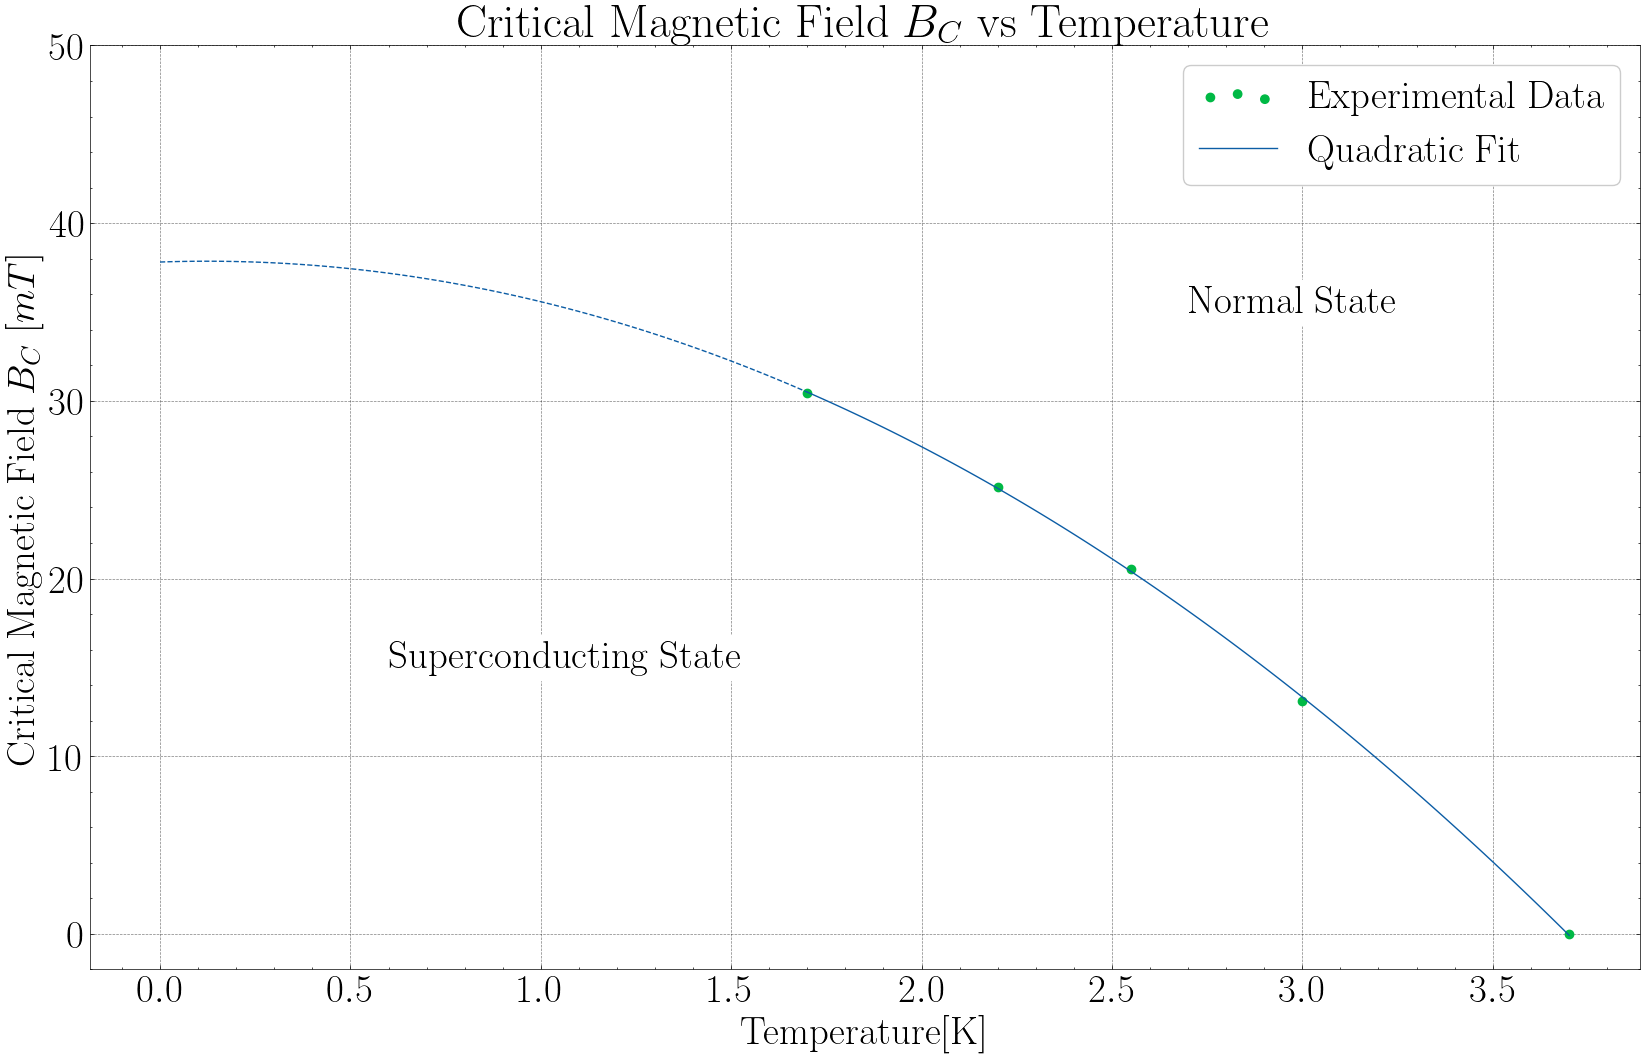

In [16]:
plt.scatter(t,b,c="#00B945",label="Experimental Data")
xa=np.linspace(1.7,3.701,100)
xb=np.linspace(0,1.7,100)
plt.plot(xa,quad(xa,-2.96368512,  0.73035124, 37.81278903),c="#0C5DA5",label="Quadratic Fit")
plt.plot(xb,quad(xb,-2.96368512,  0.73035124, 37.81278903),linestyle="--",c="#0C5DA5")


plt.annotate(r'Superconducting State', xy=(0.6, 15),  xycoords='data',backgroundcolor="w"
            )
plt.annotate(r'Normal State', xy=(2.7, 35),  xycoords='data',backgroundcolor="w"
            )

plt.title(r"Critical Magnetic Field $B_C$ vs Temperature")

plt.xlabel(r"Temperature[K]")
plt.ylabel(r"Critical Magnetic Field $B_C$ $[mT]$")

plt.legend(scatterpoints=3)
plt.ylim(-2,50)
plt.show()

In [ ]:
from scipy import stats
slope, intercept, r, p, se = stats.linregress(x, b)

time: 2.03 ms (started: 2023-05-14 17:45:58 +00:00)


In [ ]:
slope+intercept

38.75345911093629

time: 2.84 ms (started: 2023-05-14 17:45:58 +00:00)


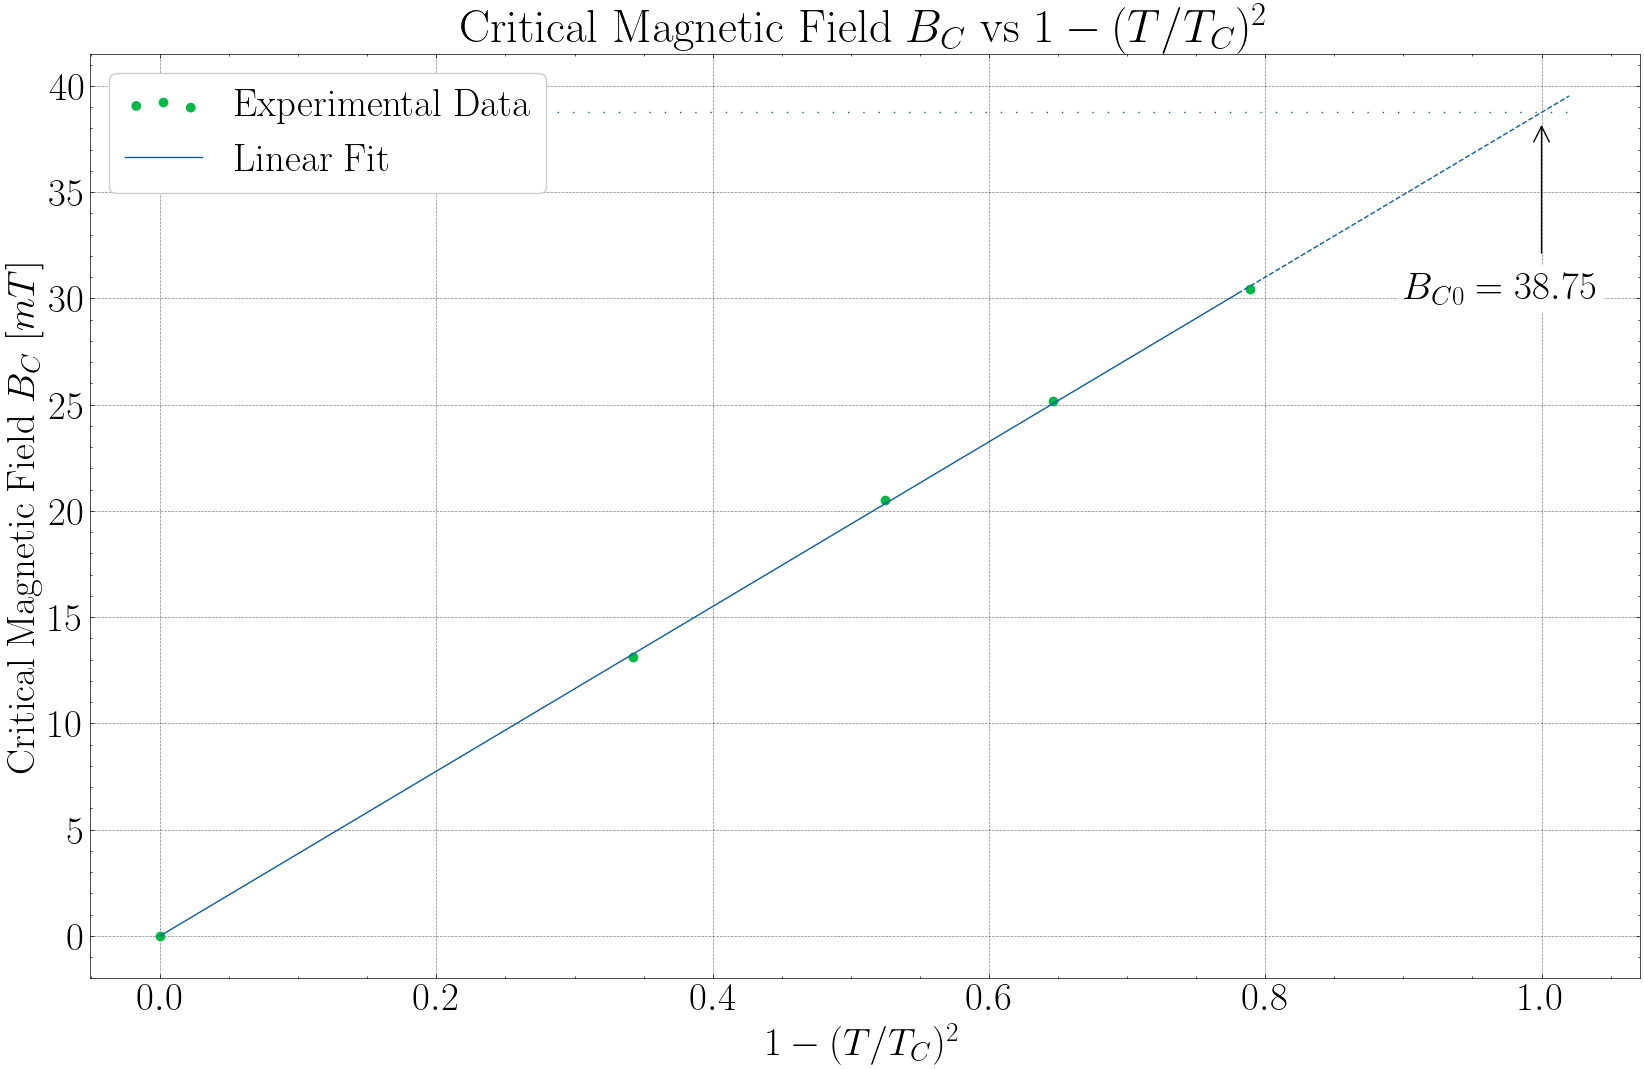

time: 2.55 s (started: 2023-05-14 17:46:09 +00:00)


In [ ]:
xn=np.linspace(0,0.78,100)
xm=np.linspace(0.78,1.02,100)
plt.scatter(x,b,c="#00B945",label="Experimental Data")
plt.plot(xn,xn*slope+intercept,c="#0C5DA5",label="Linear Fit")
plt.plot(xm,xm*slope+intercept,linestyle="--",c="#0C5DA5")

plt.hlines(38.75,0,1.02,linestyle=(0,(1,10)))

plt.annotate(r'$B_{C0}=38.75$', xy=(0.9, 30),  xycoords='data',backgroundcolor="w"
            )

plt.annotate("",
            xy=(1, 38.3), xycoords='data',
            xytext=(1, 32), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.title(r"Critical Magnetic Field $B_C$ vs $1-(T/T_C)^2$")

plt.xlabel(r"$1-(T/T_C)^2$")
plt.ylabel(r"Critical Magnetic Field $B_C$ $[mT]$")

plt.legend(scatterpoints=3)


plt.show()

In [ ]:
x=np.array([4.75,])
y=np.array([-127.5])